# Correlation Between News and Stock Movement

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import os
import pandas as pd

# Load the datasets from the specified folders
def load_data():
    stock_data_folder = '../data/yfinance_data/'  # Folder for stock data
    analyst_ratings_file = '../data/raw_analyst_ratings.csv'  # Path for analyst ratings
    
    stock_data = {}
    
    try:
        # Load each historical data file into a dictionary
        for file_name in os.listdir(stock_data_folder):
            if file_name.endswith('.csv'):  # Check if the file is a CSV
                ticker = file_name.split('_')[0]  # Extract ticker symbol
                stock_data[ticker] = pd.read_csv(os.path.join(stock_data_folder, file_name))
        
        # Load the analyst ratings (which includes news data)
        news_df = pd.read_csv(analyst_ratings_file)
        
        return stock_data, news_df
    except Exception as e:
        print(f"Error loading datasets: {e}")

# Load datasets
stock_data, news_df = load_data()

### Date Alignment

Convert date columns in the news DataFrame to datetime format and normalize dates to ensure alignment.

In [8]:
try:
    # Convert the 'date' column in news_df to datetime
    news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')
    if news_df['date'].isnull().any():
        print("Warning: Some dates could not be parsed and are set to NaT.")

    for ticker in stock_data:
        stock_data[ticker]['Date'] = pd.to_datetime(stock_data[ticker]['Date'], errors='coerce')
        stock_data[ticker] = stock_data[ticker].set_index('Date').resample('D').ffill().reset_index()

except Exception as e:
    print(f"Error converting date columns: {e}")


In [9]:
print(news_df[news_df['date'].isnull()])

         Unnamed: 0                                           headline  \
10               10    30 Stocks Moving in Friday's Pre-Market Session   
11               11  SVB Leerink Maintains Outperform on Agilent Te...   
12               12  8 Stocks Moving In Thursday's After-Hours Session   
13               13  Agilent Technologies shares are trading higher...   
14               14  Agilent Technologies Q2 Adj. EPS $0.71 Beats $...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url  \
10       https://www.benzinga.com/news/20/05/1609

In [10]:
# Remove rows where the 'date' could not be parsed
news_df = news_df.dropna(subset=['date'])


In [11]:
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')


In [12]:
print(news_df['date'].head(20))


0      2020-06-05 10:30:54-04:00
1      2020-06-03 10:45:20-04:00
2      2020-05-26 04:30:07-04:00
3      2020-05-22 12:45:06-04:00
4      2020-05-22 11:38:59-04:00
5      2020-05-22 11:23:25-04:00
6      2020-05-22 09:36:20-04:00
7      2020-05-22 09:07:04-04:00
8      2020-05-22 08:37:59-04:00
9      2020-05-22 08:06:17-04:00
1433   2020-06-09 10:52:15-04:00
1434   2020-06-08 11:29:29-04:00
1435   2020-06-08 10:32:42-04:00
1436   2020-06-05 07:40:08-04:00
1437   2020-06-04 14:46:13-04:00
1438   2020-06-03 10:19:06-04:00
1439   2020-05-27 10:10:20-04:00
1440   2020-05-27 07:32:46-04:00
1441   2020-05-26 07:47:48-04:00
1442   2020-05-18 10:50:11-04:00
Name: date, dtype: datetime64[ns, UTC-04:00]


In [13]:
try:
    for ticker in stock_data:
        stock_data[ticker]['Date'] = pd.to_datetime(stock_data[ticker]['Date'], errors='coerce')
        stock_data[ticker] = stock_data[ticker].dropna(subset=['Date'])
        stock_data[ticker] = stock_data[ticker].set_index('Date').resample('D').ffill().reset_index()
except Exception as e:
    print(f"Error converting date columns: {e}")


In [14]:

try:
    for ticker in stock_data:
        print(f"Columns in {ticker} before conversion: {stock_data[ticker].columns.tolist()}")
        
        print(f"\nSample 'Date' values before conversion for {ticker}:")
        print(stock_data[ticker]['Date'].head())
        
        stock_data[ticker]['Date'] = pd.to_datetime(stock_data[ticker]['Date'], errors='coerce')
        
        print(f"\nSample 'Date' values after conversion for {ticker}:")
        print(stock_data[ticker]['Date'].head())
        
        num_invalid_dates = stock_data[ticker]['Date'].isnull().sum()
        print(f"{ticker} has {num_invalid_dates} invalid dates (NaT) after conversion.")
        
        stock_data[ticker] = stock_data[ticker].dropna(subset=['Date'])
        print(f"{ticker} shape after dropping NaT: {stock_data[ticker].shape}")
        
        stock_data[ticker] = stock_data[ticker].set_index('Date').resample('D').ffill().reset_index()
        print(f"\nSample data for {ticker} after resampling:")
        print(stock_data[ticker].head())
        
except Exception as e:
    print(f"Error converting date columns: {e}")


Columns in AAPL before conversion: ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits']

Sample 'Date' values before conversion for AAPL:
0   1980-12-12
1   1980-12-13
2   1980-12-14
3   1980-12-15
4   1980-12-16
Name: Date, dtype: datetime64[ns]

Sample 'Date' values after conversion for AAPL:
0   1980-12-12
1   1980-12-13
2   1980-12-14
3   1980-12-15
4   1980-12-16
Name: Date, dtype: datetime64[ns]
AAPL has 0 invalid dates (NaT) after conversion.
AAPL shape after dropping NaT: (15937, 9)

Sample data for AAPL after resampling:
        Date      Open      High       Low     Close  Adj Close     Volume  \
0 1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1 1980-12-13  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
2 1980-12-14  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
3 1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
4 1980-12-16  0.113281  0.113281  

### Sentiment Analysis

Define a function to analyze the sentiment of news headlines and apply it to create a new column with scores.

In [15]:
from textblob import TextBlob

def analyze_sentiment(headline):
    """Analyze sentiment of a headline and return the polarity score."""
    return TextBlob(headline).sentiment.polarity

# Apply sentiment analysis to news headlines
try:
    news_df['sentiment'] = news_df['headline'].apply(analyze_sentiment)
except Exception as e:
    print(f"Error during sentiment analysis: {e}")

### Calculate Daily Stock Returns

Compute the daily percentage change in stock prices to represent movements.

In [16]:
try:
    for ticker in stock_data:
        stock_data[ticker]['daily_return'] = stock_data[ticker]['Close'].pct_change()  # Calculate daily returns
except Exception as e:
    print(f"Error calculating daily returns: {e}")

### Correlation Analysis

Aggregate daily sentiment scores by averaging them and merge sentiment data with stock data to calculate the Pearson correlation coefficient.

In [ ]:
# Convert and clean date columns
news_df['Date'] = pd.to_datetime(news_df['Date'], errors='coerce')
news_df = news_df.dropna(subset=['Date'])

for ticker in stock_data:
    stock_data[ticker]['Date'] = pd.to_datetime(stock_data[ticker]['Date'], errors='coerce')
    stock_data[ticker] = stock_data[ticker].dropna(subset=['Date'])
    stock_data[ticker] = stock_data[ticker].set_index('Date').resample('D').ffill().reset_index()


In [ ]:
# Aggregate sentiment by date
# Group news by 'Date' and compute average sentiment
daily_sentiment = news_df.groupby('Date')['sentiment'].mean().reset_index()



In [ ]:
# Calculate daily returns in stock data
# Calculate daily returns on the stock data before merging.

stock_data['AAPL']['daily_return'] = stock_data['AAPL']['Close'].pct_change()


In [ ]:
# Merge stock data with daily sentiment
# Merge on 'Date' using inner join to keep only dates present in both.

combined_df = pd.merge(stock_data['AAPL'], daily_sentiment, on='Date', how='inner')


In [ ]:
# Drop rows with missing values before correlation
# Remove rows where sentiment or daily_return is NaN.

combined_df = combined_df.dropna(subset=['sentiment', 'daily_return'])


In [ ]:
# print Pearson correlation

correlation = combined_df['sentiment'].corr(combined_df['daily_return'])
print(f"Pearson correlation coefficient for AAPL: {correlation}")


Pearson correlation coefficient for AAPL: -0.0017118685166299804


In [34]:
print("Sentiment unique values:", combined_df['sentiment'].nunique())
print("Daily return unique values:", combined_df['daily_return'].nunique())



Sentiment unique values: 926
Daily return unique values: 2224


In [35]:
print(f"combined_df shape: {combined_df.shape}")
print(combined_df.head())
print(combined_df[['sentiment', 'daily_return']].info())


combined_df shape: (36011, 11)
         Date       Open       High        Low      Close  Adj Close  \
0  2011-04-27  12.580000  12.583929  12.396429  12.505357  10.560461   
1  2011-04-28  12.363929  12.491071  12.340000  12.383929  10.457921   
2  2011-04-28  12.363929  12.491071  12.340000  12.383929  10.457921   
3  2011-04-29  12.385000  12.641071  12.381071  12.504643  10.559862   
4  2011-04-29  12.385000  12.641071  12.381071  12.504643  10.559862   

       Volume  Dividends  Stock Splits  daily_return  sentiment  
0   356213200        0.0           0.0     -0.000771   0.000000  
1   360959200        0.0           0.0     -0.009710   0.136364  
2   360959200        0.0           0.0     -0.009710   0.000000  
3  1006345200        0.0           0.0      0.009748  -0.166667  
4  1006345200        0.0           0.0      0.009748   0.500000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36011 entries, 0 to 36010
Data columns (total 2 columns):
 #   Column        Non-Null Coun

### Visualization 

Scatter plot to visualize the relationship between sentiment scores and daily stock returns.

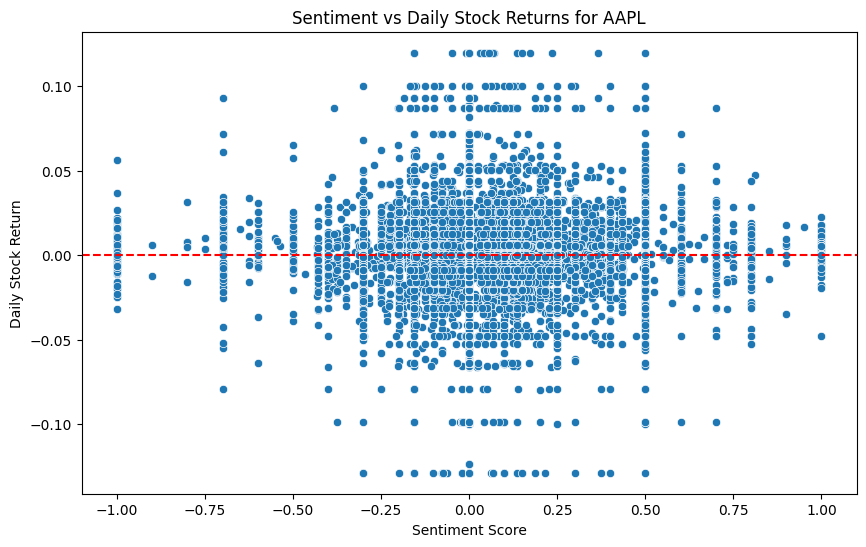

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='sentiment', y='daily_return')
plt.title('Sentiment vs Daily Stock Returns for AAPL')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.axhline(0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.show()

### Time series visualization
To see how sentiment and returns evolve over time

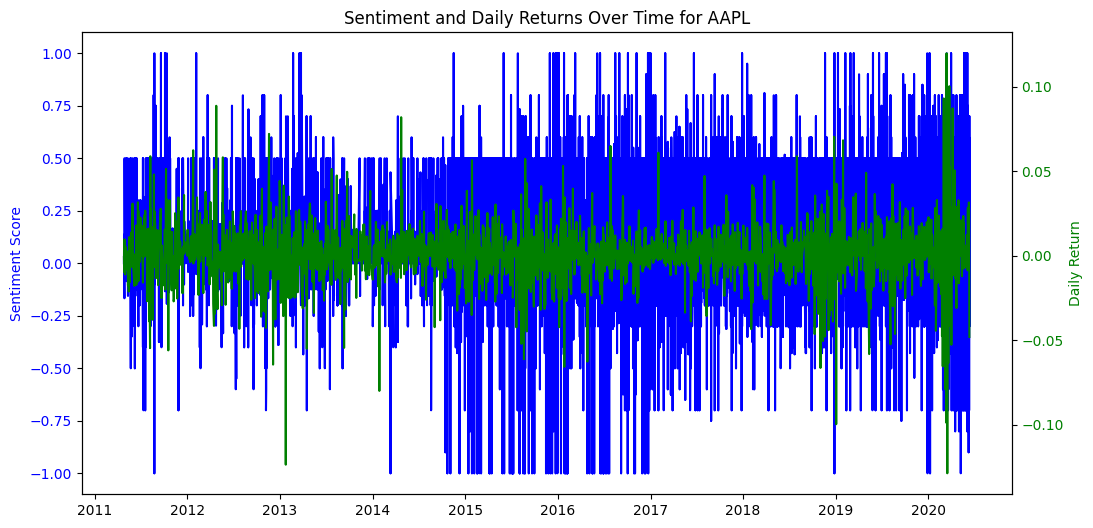

In [39]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(combined_df['Date'], combined_df['sentiment'], color='blue', label='Sentiment')
ax1.set_ylabel('Sentiment Score', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(combined_df['Date'], combined_df['daily_return'], color='green', label='Daily Return')
ax2.set_ylabel('Daily Return', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Sentiment and Daily Returns Over Time for AAPL')
plt.show()
